# Linear Models

In [71]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Dataset - Quantitative Estimation of Dehydration (Physionet)

In [114]:
# Read Dataset
FILE_NAME = 'data/dehydration/dehydration_estimation.csv'
df = pd.read_csv(FILE_NAME)

# Pre-processing
age = []
height = []
for index, row in df.iterrows():
    if np.isnan(row['age [years]']) == False:
        age.append(row['age [years]'])
        height.append(row['height [cm]'])
    else:
        age.append(age[-1])
        height.append(height[-1])
df['age [years]'] = age
df['height [cm]'] = height

df.head(3)

,id,age [years],height [cm],running speed [km/h],running interval,weight measured using Kern DE 150K2D [kg],weight measured using InBody 720 [kg],total body water using InBody 720 [l],impedance right arm at 1000kHz [Ohm],impedance left arm at 1000kHz [Ohm],impedance trunk at 1000kHz [Ohm],impedance right leg at 1000kHz [Ohm],impedance left leg at 1000kHz [Ohm],temperature ear [degree C],temperature left hand [degree C],temperature right hand [degree C],temperature left foot [degree C],temperature right foot [degree C],temperature chest [degree C],temperature back [degree C],temperature upper arm [degree C],temperature lower arm [degree C],temperature upper leg [degree C],temperature lower leg [degree C],sweat chloride [mmol/l],sweat osmolality [mmol/kg],salivary amylase [units/l],salivary chloride [mmol/l],salivary cortisol [ng/ml],salivary cortisone [ng/ml],salivary osmolality [mmol/kg],salivary potassium [mmol/l],salivary protein concentration [mg/l]
0,1,29.0,190.0,8.0,0,85.515,85.90,54.0,231.27,232.63,14.98,205.04,212.04,36.7,32.6,31.9,27.9,28.3,32.8,33.7,32.2,32.0,31.6,31.9,NaN,NaN,NaN,28.0,NaN,NaN,76.0,NaN,576.8
1,1,29.0,190.0,NaN,1,85.275,85.56,53.7,234.75,240.08,14.99,194.27,200.90,36.3,31.1,30.8,31.3,32.0,31.2,33.3,30.4,31.9,32.1,31.3,56.0,146.0,NaN,29.0,NaN,NaN,78.0,NaN,544.1
2,1,29.0,190.0,NaN,2,84.895,85.32,54.0,230.81,233.95,14.84,196.97,202.51,36.2,31.0,31.2,32.3,32.9,30.8,33.0,30.0,29.8,29.2,31.2,55.0,134.0,111700.0,35.0,1.24,11.8,84.0,37.0,537.3


In [209]:
df['f1'] = df['height [cm]']**2 / df['impedance right arm at 1000kHz [Ohm]']
df['f2'] = df['height [cm]']**2 / df['impedance left arm at 1000kHz [Ohm]']
df['f3'] = df['height [cm]']**2 / df['impedance trunk at 1000kHz [Ohm]']
df['f4'] = df['height [cm]']**2 / df['impedance right leg at 1000kHz [Ohm]']
df['f5'] = df['height [cm]']**2 / df['impedance left leg at 1000kHz [Ohm]']
df['f6'] = df['weight measured using InBody 720 [kg]']

In [229]:
df.head(3)

,id,age [years],height [cm],running speed [km/h],running interval,weight measured using Kern DE 150K2D [kg],weight measured using InBody 720 [kg],total body water using InBody 720 [l],impedance right arm at 1000kHz [Ohm],impedance left arm at 1000kHz [Ohm],impedance trunk at 1000kHz [Ohm],impedance right leg at 1000kHz [Ohm],impedance left leg at 1000kHz [Ohm],temperature ear [degree C],temperature left hand [degree C],temperature right hand [degree C],temperature left foot [degree C],temperature right foot [degree C],temperature chest [degree C],temperature back [degree C],temperature upper arm [degree C],temperature lower arm [degree C],temperature upper leg [degree C],temperature lower leg [degree C],sweat chloride [mmol/l],sweat osmolality [mmol/kg],salivary amylase [units/l],salivary chloride [mmol/l],salivary cortisol [ng/ml],salivary cortisone [ng/ml],salivary osmolality [mmol/kg],salivary potassium [mmol/l],salivary protein concentration [mg/l],f1,f2,f3,f4,f5,f6
0,1,29.0,190.0,8.0,0,85.515,85.90,54.0,231.27,232.63,14.98,205.04,212.04,36.7,32.6,31.9,27.9,28.3,32.8,33.7,32.2,32.0,31.6,31.9,NaN,NaN,NaN,28.0,NaN,NaN,76.0,NaN,576.8,156.094608,155.182049,2409.879840,176.063207,170.250896,85.90
1,1,29.0,190.0,NaN,1,85.275,85.56,53.7,234.75,240.08,14.99,194.27,200.90,36.3,31.1,30.8,31.3,32.0,31.2,33.3,30.4,31.9,32.1,31.3,56.0,146.0,NaN,29.0,NaN,NaN,78.0,NaN,544.1,153.780618,150.366544,2408.272181,185.823853,179.691389,85.56
2,1,29.0,190.0,NaN,2,84.895,85.32,54.0,230.81,233.95,14.84,196.97,202.51,36.2,31.0,31.2,32.3,32.9,30.8,33.0,30.0,29.8,29.2,31.2,55.0,134.0,111700.0,35.0,1.24,11.8,84.0,37.0,537.3,156.405702,154.306476,2432.614555,183.276641,178.262802,85.32


In [232]:
# Split train and test dataset
np.random.seed(10)
indices = np.random.permutation(df['id'].unique())
df_train = df[df['id'].isin(indices[:8])]
df_test = df[df['id'].isin(indices[8:])]

X_train = df_train[['f1', 'f2','f3','f4','f5', 'f6']]
y_train = df_train['total body water using InBody 720 [l]']
y_train_2 = df_train['age [years]']

X_test = df_test[['f1', 'f2','f3','f4','f5', 'f6']]
y_test = df_test['total body water using InBody 720 [l]']
y_test_2 = df_test['age [years]']

## Linear Regression
- Minimize residual sum of squares (RSS) over the training data
- May be too sensitive to the training data

In [233]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
print ('Coefficients: \n', reg.coef_)
print ('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.07105762  0.01603852  0.00592537  0.1654503  -0.16227921  0.38832094]
Intercept: 
 -8.278114221207709
Mean Squared Error: 3.07
Coefficient of determination: 0.93


## Ridge Regression
- Add a new term to the optimization - Shrinkage Penalty
- Introduces a bias to the model
- Reduces the model variance(the sensitivity of the model to the data)
- Can results in a more robust model with new data

In [234]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.07106276  0.01591467  0.00593006  0.16516057 -0.16194492  0.38782355]
Intercept: 
 -8.23690290058267
Mean Squared Error: 3.04
Coefficient of determination: 0.93


## Lasso Regression
- Both regularization and variable selection

In [235]:
reg = linear_model.Lasso(alpha=0.34)
reg.fit(X_train, y_train)

print ('Coeffcients: \n', reg.coef_)
print ('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coeffcients: 
 [ 0.07120852 -0.          0.00664807  0.09300956 -0.081999    0.3158546 ]
Intercept: 
 -2.7359324800808267
Mean Squared Error: 0.76
Coefficient of determination: 0.98


### Lasso Model Selection

In [236]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

EPSILON = 1e-4

#### LassoLarsIC: Least angle regression with BIC/AIC criterion

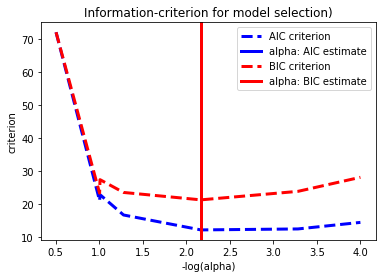

In [237]:
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_train, y_train)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    
    criterion_ = model.criterion_
    
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
            linewidth=3, label='%s criterion' % name)
    
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
               label='alpha: %s estimate'% name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection)')
plt.axis('tight')
plt.show()

#### LassoCV: coordinate descent

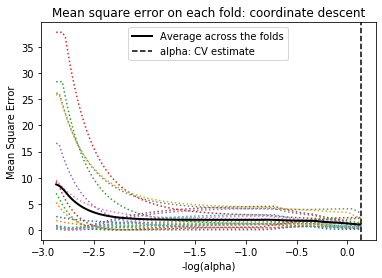

In [238]:
model = LassoCV(cv=20).fit(X_train, y_train)

m_log_alphas = -np.log10(model.alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
        label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
           label='alpha: CV estimate')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean Square Error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.show()

#### LassoLarsCV: least angle regression

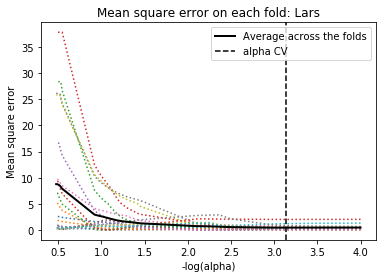

In [239]:
model = LassoLarsCV(cv=20).fit(X_train, y_train)

m_log_alphas = -np.log10(model.cv_alphas_+EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
        label = 'Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
           label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars')
plt.axis('tight')
plt.show()

### Multi-task Lasso
- To leverage useful information contained in multiple related tasks to help improve the generalization performance of all the tasks

In [247]:
from sklearn.linear_model import MultiTaskLasso

model = MultiTaskLasso(alpha=1.0)
model.fit(X_train, np.array([y_train, y_train_2]).T)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

y_pred = model.predict(X_test)[:,0]

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 0.09113208 -0.01926989  0.00694189  0.0249711  -0.01166899  0.30551035]
 [ 0.09908787  0.18651411 -0.01232082  0.03729957  0.01346477  0.75802992]]
Intercept: 
 [ -2.90913967 -62.41642268]
Mean Squared Error: 1.04
Coefficient of determination: 0.98


## Elastic Net
- A linear regression model trained with both L1 and L2 norm regularization
- Control the convex combination of L1 and L2 using the l1_ratio parameter
- Useful when there are multiple features which are correlated with on e another

In [248]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

y_pred = model.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.05457441 -0.          0.00716272  0.06526705 -0.04746237  0.25111053]
Intercept: 
 2.8521199073377304
Mean Squared Error: 0.62
Coefficient of determination: 0.99


## Least Angle Regression (LARS)
- For high-dimensional data
- Similar to forward stepwise regression
- At each step, it finds the feature most correlated with the target

In [257]:
from sklearn.linear_model import Lars

model = Lars(n_nonzero_coefs=4)
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

y_pred = model.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [0.10053971 0.         0.00594212 0.01031545 0.         0.368111  ]
Intercept: 
 -9.621486333203308
Mean Squared Error: 4.99
Coefficient of determination: 0.88
